In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt

# **Importing the dataset**

In [2]:
# Importing the dataset
dataset = pd.read_csv('heart.csv')

In [3]:
# Verifying the first lines
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
# Type and Missing Values information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
# Verfying the distribution of the numerical variables
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
# Verifying errors in the variables
for col in dataset.columns:
    print(col + ':',dataset.loc[:,col].unique())

Age: [40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
Sex: ['M' 'F']
ChestPainType: ['ATA' 'NAP' 'ASY' 'TA']
RestingBP: [140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
Cholesterol: [289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331 341 243 279 198 249 168 603
 159 190 185 290 212 231 222 235 320 187 266 287 40

Apparently there is no observation with missing values and abnormal input, hence no imputation is needed before a more careful exploration.

# **Preprocessing the variables**

The categorical variables of the dataset have no apparent order, therefore we will only the OneHotEncoding

In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Features considering the OneHotEncoding of the dataset
feature_names = (
'Sex: M',
'ExerciseAngina: Y',
'ChestPainType: ASY',
'ChestPainType: ATA',
'ChestPainType: NAP',
'ChestPainType: TA',
'RestingECG: LVH',
'RestingECG: Normal',
'RestingECG: ST',
'ST_Slope: Down',
'ST_Slope: Flat',
'ST_Slope: Up',
'Age',
'RestingBP',
'Cholesterol',
'FastingBS',
'MaxHR',
'Oldpeak',
'HeartDisease')


n_examples = len(dataset)
n_features = len(feature_names)

# OneHotEncoding the dataset
ct = ColumnTransformer([
    ('OneHotEncoding drop:',OneHotEncoder(drop='first'),['Sex','ExerciseAngina']),
    ('OneHotEncoding:',OneHotEncoder(),['ChestPainType','RestingECG','ST_Slope'])],remainder='passthrough')

X = ct.fit_transform(dataset)

In [8]:
# Saving the encoded dataset
dataset_encoded = pd.DataFrame(X,columns=feature_names)
dataset_encoded.to_csv('heart_preprocessed.csv',index=False,encoding='utf-8')
dataset_encoded.head()

,Sex: M,ExerciseAngina: Y,ChestPainType: ASY,ChestPainType: ATA,ChestPainType: NAP,ChestPainType: TA,RestingECG: LVH,RestingECG: Normal,RestingECG: ST,ST_Slope: Down,ST_Slope: Flat,ST_Slope: Up,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,40.0,140.0,289.0,0.0,172.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,49.0,160.0,180.0,0.0,156.0,1.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,37.0,130.0,283.0,0.0,98.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,48.0,138.0,214.0,0.0,108.0,1.5,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,54.0,150.0,195.0,0.0,122.0,0.0,0.0


# **Exploring the variables**

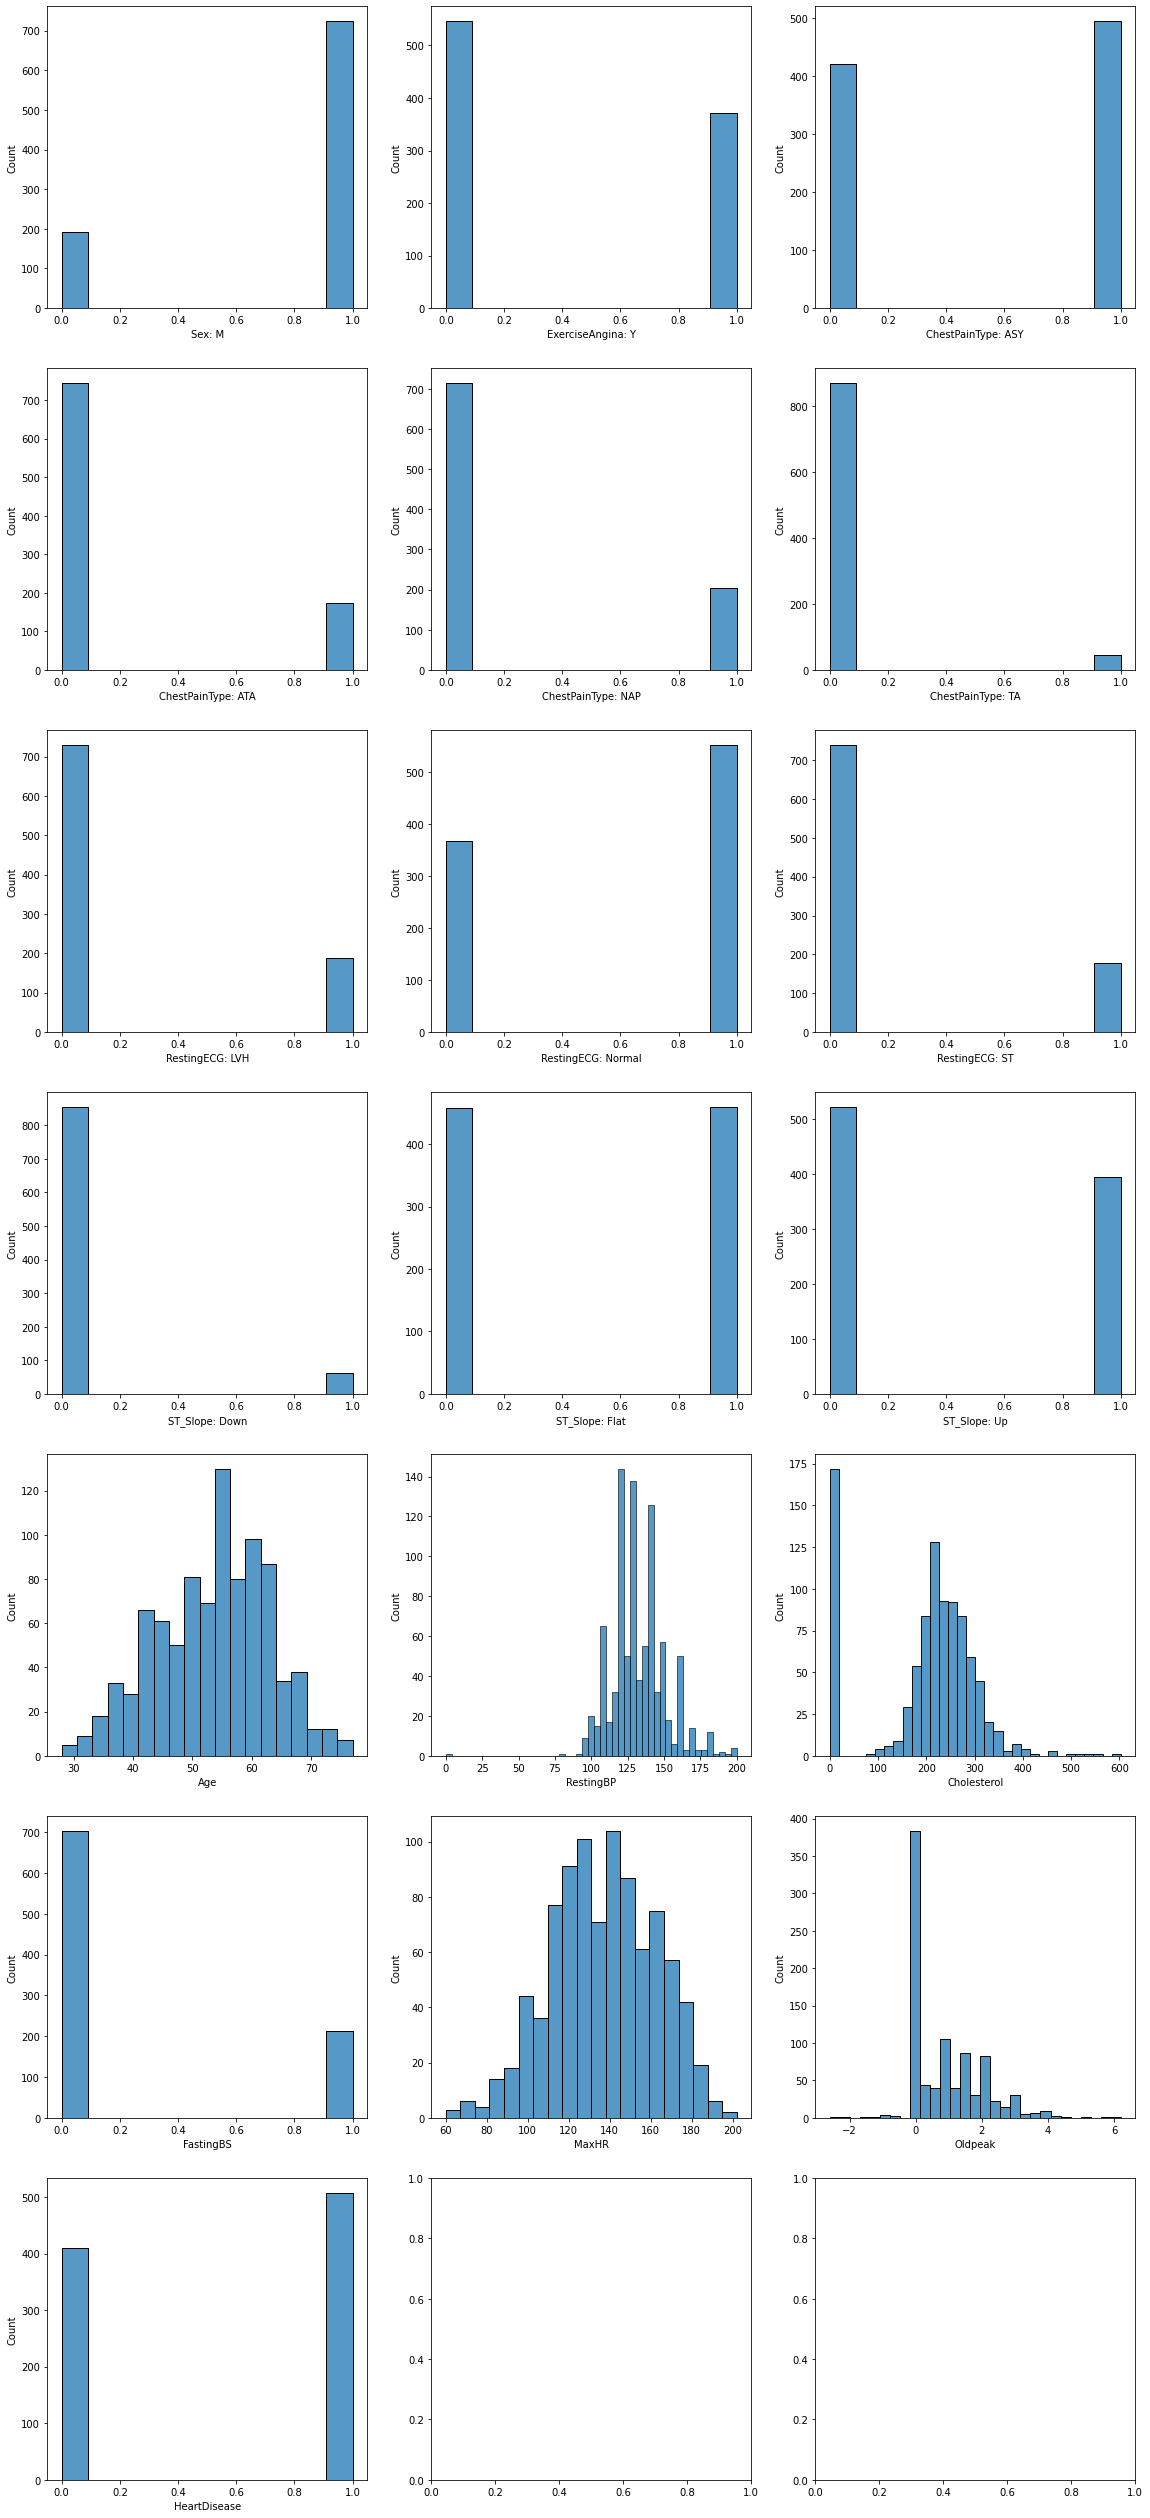

In [9]:
ncols = 3
nrows = (n_features//ncols) + 1 if n_features%ncols>0 else (n_features//ncols)

# Ploting histograms
fig,axes = plt.subplots(nrows=nrows,ncols=ncols)
fig.set_size_inches(6.5*ncols,6.5*nrows)

for i in range(n_features):
    col = i%ncols
    row = i//ncols 
    ax = axes[row,col]
    sns.histplot(data=dataset_encoded,x=feature_names[i],ax=ax)
plt.show()
fig.savefig('dataset_histogram.pdf',dpi=300)

There are some observations that can be done by the exploratory analysis of these variables:

$\bullet$ The response variable is balanced, meaning that there is not significative difference between the response 0 and 1.

$\bullet$ The numerical variables, except the Oldpeak, have a approximately normal distribution aspect.

$\bullet$ The Cholesterol and RestingBP variable have an abnormal value 0, since the absence of Cholesterol is not probable, at least for a large amount of people, and the RestingBP equal 0 mean that the heart stopped beating.

In [10]:
dataset_encoded[dataset_encoded['RestingBP'] < 25.0]

,Sex: M,ExerciseAngina: Y,ChestPainType: ASY,ChestPainType: ATA,ChestPainType: NAP,ChestPainType: TA,RestingECG: LVH,RestingECG: Normal,RestingECG: ST,ST_Slope: Down,ST_Slope: Flat,ST_Slope: Up,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
449,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,55.0,0.0,0.0,0.0,155.0,1.5,1.0


In [11]:
dataset_encoded[dataset_encoded['Cholesterol'] == 0.0]

,Sex: M,ExerciseAngina: Y,ChestPainType: ASY,ChestPainType: ATA,ChestPainType: NAP,ChestPainType: TA,RestingECG: LVH,RestingECG: Normal,RestingECG: ST,ST_Slope: Down,ST_Slope: Flat,ST_Slope: Up,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
293,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,65.0,115.0,0.0,0.0,93.0,0.0,1.0
294,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,32.0,95.0,0.0,1.0,127.0,0.7,1.0
295,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,61.0,105.0,0.0,1.0,110.0,1.5,1.0
296,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,50.0,145.0,0.0,1.0,139.0,0.7,1.0
297,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,57.0,110.0,0.0,1.0,131.0,1.4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,43.0,122.0,0.0,0.0,120.0,0.5,1.0
515,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,63.0,130.0,0.0,1.0,160.0,3.0,0.0
518,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,48.0,102.0,0.0,1.0,110.0,1.0,1.0
535,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,56.0,130.0,0.0,0.0,122.0,1.0,1.0


 The case of RestingBP = 0 is not significative, since it may be the case of heart attack and even if it is not the case, there is only one observation with RestingBP = 0. 
 
 But the Cholesterol may be an error, since it occurs in most entries. 

# **Preprocessing Version 2**

In [12]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Features considering the OneHotEncoding and simple imputation of the dataset
feature_names = (
'Sex: M',
'ExerciseAngina: Y',
'ChestPainType: ASY',
'ChestPainType: ATA',
'ChestPainType: NAP',
'ChestPainType: TA',
'RestingECG: LVH',
'RestingECG: Normal',
'RestingECG: ST',
'ST_Slope: Down',
'ST_Slope: Flat',
'ST_Slope: Up',
'Cholesterol',
'Age',
'RestingBP',
'FastingBS',
'MaxHR',
'Oldpeak',
'HeartDisease')


n_examples = len(dataset)
n_features = len(feature_names)

# OneHotEncoding the dataset
ct = ColumnTransformer([
    ('OneHotEncoding drop:',OneHotEncoder(drop='first'),['Sex','ExerciseAngina']),
    ('OneHotEncoding:',OneHotEncoder(),['ChestPainType','RestingECG','ST_Slope']),
    ('Simple Imputation: ',SimpleImputer(missing_values=0.0,strategy='median'),['Cholesterol'])],remainder='passthrough')

X = ct.fit_transform(dataset)

In [13]:
# Saving the encoded dataset
dataset_encoded = pd.DataFrame(X,columns=feature_names)
dataset_encoded.to_csv('heart_preprocessed.csv',index=False,encoding='utf-8')
dataset_encoded.head()

,Sex: M,ExerciseAngina: Y,ChestPainType: ASY,ChestPainType: ATA,ChestPainType: NAP,ChestPainType: TA,RestingECG: LVH,RestingECG: Normal,RestingECG: ST,ST_Slope: Down,ST_Slope: Flat,ST_Slope: Up,Cholesterol,Age,RestingBP,FastingBS,MaxHR,Oldpeak,HeartDisease
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,289.0,40.0,140.0,0.0,172.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,180.0,49.0,160.0,0.0,156.0,1.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,283.0,37.0,130.0,0.0,98.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,214.0,48.0,138.0,0.0,108.0,1.5,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,195.0,54.0,150.0,0.0,122.0,0.0,0.0


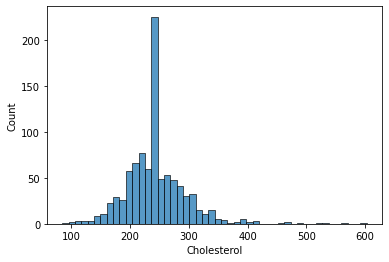

In [14]:
sns.histplot(data=dataset_encoded, x = 'Cholesterol')

In [15]:
dataset_encoded[dataset_encoded['Cholesterol'] == 0.0]

,Sex: M,ExerciseAngina: Y,ChestPainType: ASY,ChestPainType: ATA,ChestPainType: NAP,ChestPainType: TA,RestingECG: LVH,RestingECG: Normal,RestingECG: ST,ST_Slope: Down,ST_Slope: Flat,ST_Slope: Up,Cholesterol,Age,RestingBP,FastingBS,MaxHR,Oldpeak,HeartDisease


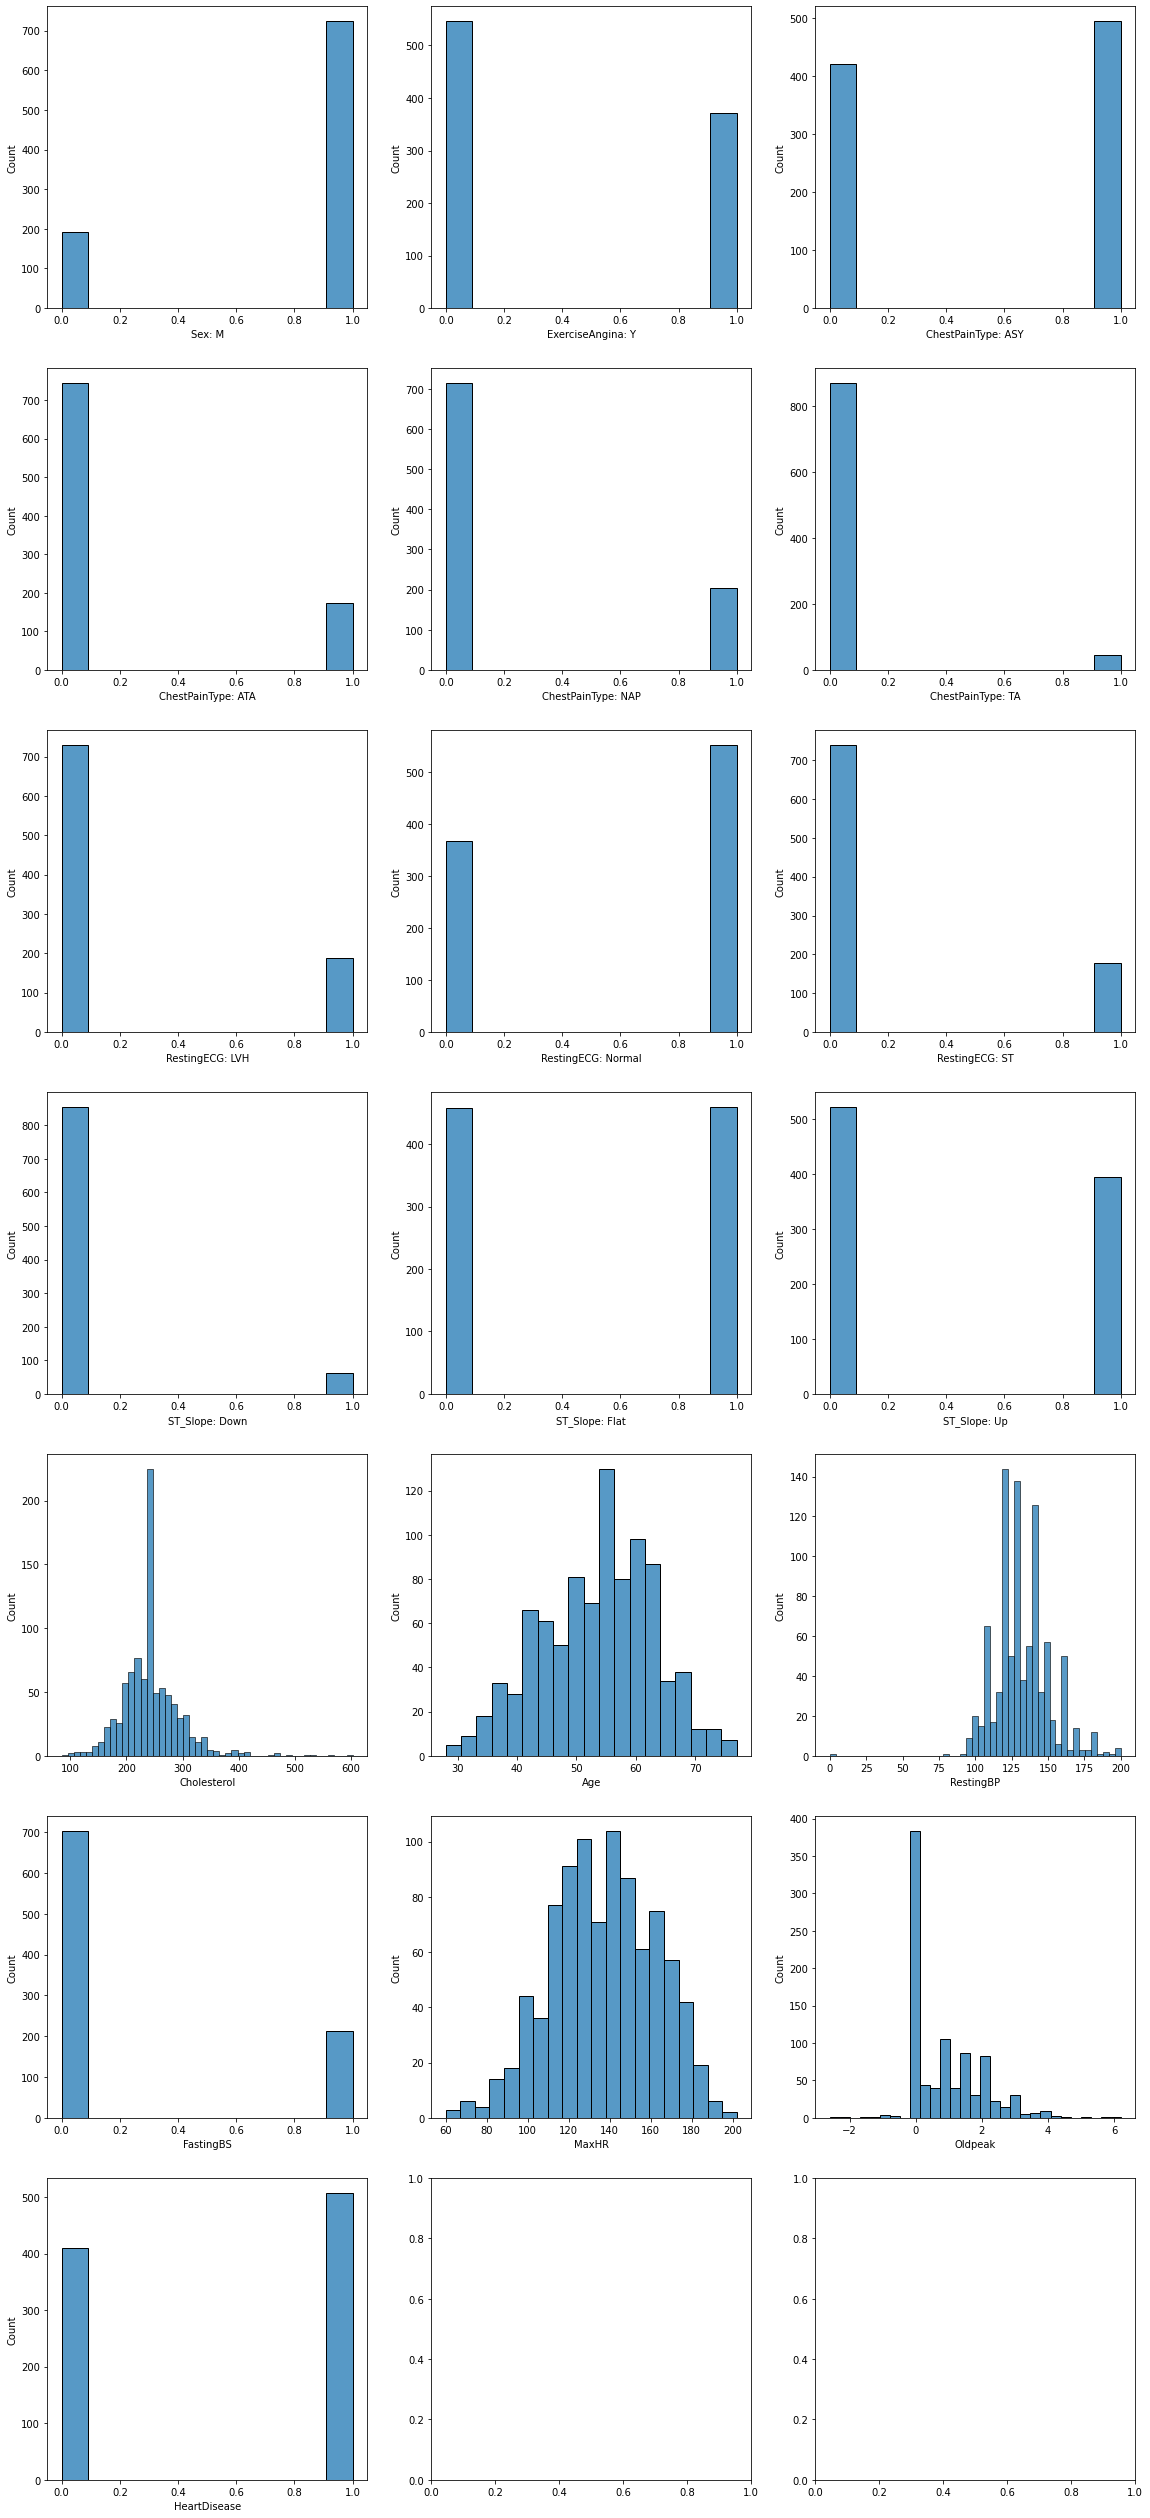

In [16]:
ncols = 3
nrows = (n_features//ncols) + 1 if n_features%ncols>0 else (n_features//ncols)

# Ploting histograms
fig,axes = plt.subplots(nrows=nrows,ncols=ncols)
fig.set_size_inches(6.5*ncols,6.5*nrows)

for i in range(n_features):
    col = i%ncols
    row = i//ncols 
    ax = axes[row,col]
    sns.histplot(data=dataset_encoded,x=feature_names[i],ax=ax)
plt.show()
fig.savefig('dataset_histogram_imputed.pdf',dpi=300)

In [17]:
from sklearn.preprocessing import MinMaxScaler


# Separating the input and output variables
n_features = X.shape[1]
X = dataset_encoded.values[:,:-1]
y = dataset_encoded.values[:,-1:]

y = y.astype(int)
X = X.astype(float)


n_examples = len(y)

# Train-Test Split
index = list(range(n_examples))

# 70 % - 30 % Train-Test Split
train_size = int(0.7*n_examples)
test_size = n_examples - train_size

# Shuffling Train-Test indices
np.random.seed(42)
np.random.shuffle(index)
train_index = index[:train_size].copy()
test_index = index[train_size:].copy()
np.random.seed(None)

# Train-Test Splitting
X_train,X_test,y_train,y_test = X[train_index],X[test_index],y[train_index],y[test_index]

# Scaling for regularization
sc_X = MinMaxScaler()
X_train_sc = sc_X.fit_transform(X_train)
X_test_sc = sc_X.transform(X_test)

We can infer a baseline performance, fitting the model in all the features

In [18]:
# Randomized Search and distributions
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from scipy.stats import loguniform
from scipy.stats import randint



# Models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#Time
from tqdm.notebook import tqdm






########################### Logistic Regression ####################################


LR = LogisticRegression(random_state=42,solver='liblinear')

penalty = ['l1','l2']

# Hyperparameters distributions
distributions = dict(C=loguniform(1e-2,1e5),penalty=penalty)


RSCV_LR = RandomizedSearchCV(LR,param_distributions=distributions,n_iter=25,random_state=42)


########################### CART ####################################


cart = DecisionTreeClassifier(random_state=42)



# Hyperparameters distributions
distributions = dict(max_depth=list(range(2,20)))


RSCV_cart = RandomizedSearchCV(cart,param_distributions=distributions,n_iter=15,random_state=42)






########################### Random Forest ####################################


rf = RandomForestClassifier(random_state=42)



# Hyperparameters distributions
distributions = dict(max_depth=list(range(2,20)),n_estimators=randint(50,500))


RSCV_RF = RandomizedSearchCV(rf,param_distributions=distributions,n_iter=10,random_state=42)




########################### SVR ####################################


SV_class = SVC(degree=2)

kernel = ['rbf','poly','sigmoid']

# Hyperparameters distributions
distributions = dict(C=loguniform(1e-2,1e5),kernel=kernel)


RSCV_SVC = RandomizedSearchCV(SV_class,param_distributions=distributions,n_iter=10,random_state=42)


########################### XGBoost ####################################
xgbc = XGBClassifier(eval_metric='logloss',use_label_encoder=False,random_state=42)
# Hyperparameters distributions
param_dist = {'n_estimators': randint(150, 500),
              'learning_rate': loguniform(5e-4, 5e-2),
              'subsample': uniform(0.3, 0.6),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': uniform(0.5, 0.4),
              'min_child_weight': [1, 2, 3, 4]
             }


RSCV_xgb = RandomizedSearchCV(xgbc,param_distributions=param_dist,n_iter=25,random_state=42)


########################### XGBoost ####################################
knn = KNeighborsClassifier()
# Hyperparameters distributions
distributions = dict(n_neighbors=list(range(2,20)))


RSCV_knn = RandomizedSearchCV(knn,param_distributions=distributions,n_iter=10,random_state=42)





########################### Loop ####################################

# Each Random Search Cross Validation
Random_search = {'LR':RSCV_LR,
                'CART':RSCV_cart, 
                'RF':RSCV_RF,
                'SVM':RSCV_SVC,
                'XGBoost':RSCV_xgb,
                'KNN':RSCV_knn}




y_train = y_train.reshape(len(y_train),)
y_test = y_test.reshape(len(y_test),)
Best_model = {}
Results = {}
Best_params = {}
############ Model Loop ################
for s in tqdm(['LR', 'CART', 'RF', 'SVM', 'XGBoost', 'KNN']):
    # Random Grid Search CV
    model_random_search = Random_search[s]
    model_random_search.fit(X_train_sc,y_train)
    # Choose the best estimator
    best_model_ = model_random_search.best_estimator_
    y_pred = best_model_.predict(X_test_sc)
    Best_model.update({s:best_model_})
    
    Results.update({s:{'CV_score':model_random_search.best_score_,
                      'Accuracy':accuracy_score(y_test,y_pred),
                      'Classification Report':pd.DataFrame(classification_report(y_test,y_pred,digits=4,output_dict=True)).T}})
    Best_params.update({s:model_random_search.best_params_})

  0%|          | 0/6 [00:00<?, ?it/s]

In [19]:
for model in Results.keys():
    print(model)
    display(Results[model])

LR


{'Accuracy': 0.8369565217391305,
 'CV_score': 0.8784883720930232,
 'Classification Report':               precision    recall  f1-score     support
 0              0.908257  0.738806  0.814815  134.000000
 1              0.790419  0.929577  0.854369  142.000000
 accuracy       0.836957  0.836957  0.836957    0.836957
 macro avg      0.849338  0.834192  0.834592  276.000000
 weighted avg   0.847630  0.836957  0.835165  276.000000}

CART


{'Accuracy': 0.822463768115942,
 'CV_score': 0.8520227713178293,
 'Classification Report':               precision    recall  f1-score     support
 0              0.857143  0.761194  0.806324  134.000000
 1              0.796178  0.880282  0.836120  142.000000
 accuracy       0.822464  0.822464  0.822464    0.822464
 macro avg      0.826661  0.820738  0.821222  276.000000
 weighted avg   0.825777  0.822464  0.821654  276.000000}

RF


{'Accuracy': 0.8333333333333334,
 'CV_score': 0.8831758720930232,
 'Classification Report':               precision    recall  f1-score     support
 0              0.900000  0.738806  0.811475  134.000000
 1              0.789157  0.922535  0.850649  142.000000
 accuracy       0.833333  0.833333  0.833333    0.833333
 macro avg      0.844578  0.830671  0.831062  276.000000
 weighted avg   0.842972  0.833333  0.831630  276.000000}

SVM


{'Accuracy': 0.8079710144927537,
 'CV_score': 0.8706758720930232,
 'Classification Report':               precision    recall  f1-score     support
 0              0.840336  0.746269  0.790514  134.000000
 1              0.783439  0.866197  0.822742  142.000000
 accuracy       0.807971  0.807971  0.807971    0.807971
 macro avg      0.811888  0.806233  0.806628  276.000000
 weighted avg   0.811063  0.807971  0.807095  276.000000}

XGBoost


{'Accuracy': 0.8333333333333334,
 'CV_score': 0.8862645348837208,
 'Classification Report':               precision    recall  f1-score     support
 0              0.885965  0.753731  0.814516  134.000000
 1              0.796296  0.908451  0.848684  142.000000
 accuracy       0.833333  0.833333  0.833333    0.833333
 macro avg      0.841131  0.831091  0.831600  276.000000
 weighted avg   0.839831  0.833333  0.832095  276.000000}

KNN


{'Accuracy': 0.8043478260869565,
 'CV_score': 0.8691254844961239,
 'Classification Report':               precision    recall  f1-score     support
 0              0.877358  0.694030  0.775000  134.000000
 1              0.758824  0.908451  0.826923  142.000000
 accuracy       0.804348  0.804348  0.804348    0.804348
 macro avg      0.818091  0.801240  0.800962  276.000000
 weighted avg   0.816373  0.804348  0.801714  276.000000}

# **Feature selection with the best model**

We can see that the Logistic Regression and XGBoost have similar performances, then by the simplicity of the Logistic Regression we will use this model

In [20]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
# Best model Feature Selector
xgb_class = Best_model['LR']

########################### Loop ####################################
# Forward Selection
sfs1 = sfs(xgb_class,k_features=1,forward=False,verbose=12,scoring='accuracy')
# Forward Feature Selection
X_train_sc_features = sfs1.fit_transform(X_train_sc,y_train)
X_test_sc_features = sfs1.transform(X_test_sc)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.

In [21]:
# Performance (cross-validation) for each number of features
feature_selection = pd.DataFrame(sfs1.subsets_).T
feature_selection

,feature_idx,cv_scores,avg_score,feature_names
18,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.8682170542635659, 0.8992248062015504, 0.867...",0.878488,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
17,"(0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14...","[0.875968992248062, 0.8992248062015504, 0.875,...",0.881601,"(0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14..."
16,"(0, 1, 2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 1...","[0.875968992248062, 0.9069767441860465, 0.875,...",0.883152,"(0, 1, 2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 1..."
15,"(0, 1, 2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 1...","[0.875968992248062, 0.9069767441860465, 0.875,...",0.883152,"(0, 1, 2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 1..."
14,"(0, 1, 2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 15, 16)","[0.875968992248062, 0.9069767441860465, 0.875,...",0.883152,"(0, 1, 2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 15, 16)"
13,"(0, 1, 2, 3, 4, 5, 6, 8, 10, 11, 12, 15, 16)","[0.875968992248062, 0.9069767441860465, 0.875,...",0.883152,"(0, 1, 2, 3, 4, 5, 6, 8, 10, 11, 12, 15, 16)"
12,"(0, 1, 2, 3, 4, 5, 6, 8, 10, 11, 15, 16)","[0.875968992248062, 0.9069767441860465, 0.875,...",0.883152,"(0, 1, 2, 3, 4, 5, 6, 8, 10, 11, 15, 16)"
11,"(0, 1, 2, 3, 4, 5, 8, 10, 11, 15, 16)","[0.875968992248062, 0.9069767441860465, 0.875,...",0.883152,"(0, 1, 2, 3, 4, 5, 8, 10, 11, 15, 16)"
10,"(0, 1, 2, 3, 4, 5, 10, 11, 15, 16)","[0.875968992248062, 0.9069767441860465, 0.875,...",0.883152,"(0, 1, 2, 3, 4, 5, 10, 11, 15, 16)"
9,"(0, 1, 2, 3, 4, 10, 11, 15, 16)","[0.875968992248062, 0.9069767441860465, 0.875,...",0.883152,"(0, 1, 2, 3, 4, 10, 11, 15, 16)"


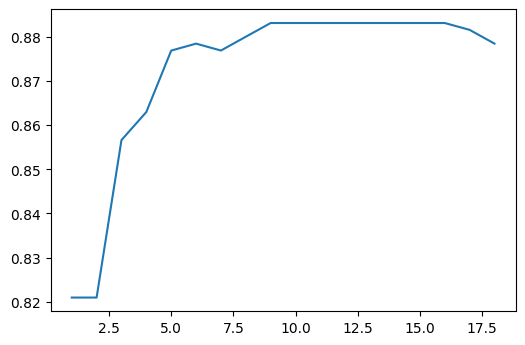

In [22]:
# Features plot cross-validation average score
fig = plt.figure(dpi = 100)
plt.plot(feature_selection['avg_score'])
plt.show()

In [23]:
feature_selection['avg_score'] = feature_selection['avg_score'].astype(float)
feature_selection['avg_score']

18    0.878488
17    0.881601
16    0.883152
15    0.883152
14    0.883152
13    0.883152
12    0.883152
11    0.883152
10    0.883152
9     0.883152
8     0.880039
7     0.876914
6     0.878476
5     0.876902
4     0.862984
3     0.856625
2     0.820942
1     0.820942
Name: avg_score, dtype: float64

# **Train with Selected features**

In [24]:
# Features selected
features_selected = (0, 1, 2, 3, 11, 15)
features_selected_names = []
n_features_selected = len(features_selected)
for i in range(n_features_selected):
    idx = features_selected[i]
    features_selected_names.append(feature_names[idx])


# Displaying Features
features_string = ''
for string in features_selected_names:
    features_string += string + '\n'
print(features_string)

Sex: M
ExerciseAngina: Y
ChestPainType: ASY
ChestPainType: ATA
ST_Slope: Up
FastingBS



In [25]:
# Features selected
X_train_sc_features = X_train_sc[:,features_selected]
X_test_sc_features = X_test_sc[:,features_selected]

In [26]:
########################### Logistic Regression ####################################


LR = LogisticRegression(random_state=42,solver='liblinear')

penalty = ['l1','l2']

# Hyperparameters distributions
distributions = dict(C=loguniform(1e-2,1e5),penalty=penalty)


RSCV_LR = RandomizedSearchCV(LR,param_distributions=distributions,n_iter=25,random_state=42)


########################### CART ####################################


cart = DecisionTreeClassifier(random_state=42)



# Hyperparameters distributions
distributions = dict(max_depth=list(range(2,20)))


RSCV_cart = RandomizedSearchCV(cart,param_distributions=distributions,n_iter=15,random_state=42)






########################### Random Forest ####################################


rf = RandomForestClassifier()



# Hyperparameters distributions
distributions = dict(max_depth=list(range(2,20)),n_estimators=randint(50,500))


RSCV_RF = RandomizedSearchCV(rf,param_distributions=distributions,n_iter=10,random_state=42)




########################### SVR ####################################


SV_class = SVC(degree=2)

kernel = ['rbf','poly','sigmoid']

# Hyperparameters distributions
distributions = dict(C=loguniform(1e-2,1e5),kernel=kernel)


RSCV_SVC = RandomizedSearchCV(SV_class,param_distributions=distributions,n_iter=10,random_state=42)


########################### XGBoost ####################################
xgbc = XGBClassifier(eval_metric='logloss',use_label_encoder=False)
# Hyperparameters distributions
param_dist = {'n_estimators': randint(150, 500),
              'learning_rate': loguniform(5e-4, 5e-2),
              'subsample': uniform(0.3, 0.6),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': uniform(0.5, 0.4),
              'min_child_weight': [1, 2, 3, 4]
             }


RSCV_xgb = RandomizedSearchCV(xgbc,param_distributions=param_dist,n_iter=25,random_state=42)


########################### XGBoost ####################################
knn = KNeighborsClassifier()
# Hyperparameters distributions
distributions = dict(n_neighbors=list(range(2,20)))


RSCV_knn = RandomizedSearchCV(knn,param_distributions=distributions,n_iter=10,random_state=42)





########################### Loop ####################################

# Each Random Search Cross Validation
Random_search = {'LR':RSCV_LR,
                'CART':RSCV_cart, 
                'RF':RSCV_RF,
                'SVM':RSCV_SVC,
                'XGBoost':RSCV_xgb,
                'KNN':RSCV_knn}




y_train = y_train.reshape(len(y_train),)
y_test = y_test.reshape(len(y_test),)
Best_model = {}
Results = {}
Best_params = {}
############ Model Loop ################
for s in tqdm(['LR', 'CART', 'RF', 'SVM', 'XGBoost', 'KNN']):
    # Random Grid Search CV
    model_random_search = Random_search[s]
    model_random_search.fit(X_train_sc_features,y_train)
    # Update the best model
    best_model_ = model_random_search.best_estimator_
    y_pred = best_model_.predict(X_test_sc_features)
    Best_model.update({s:best_model_})
    Results.update({s:{'CV_score':model_random_search.best_score_,
                      'Accuracy':accuracy_score(y_test,y_pred),
                      'Classification Report':pd.DataFrame(classification_report(y_test,y_pred,digits=4,output_dict=True)).T}})
    Best_params.update({s:model_random_search.best_params_})

  0%|          | 0/6 [00:00<?, ?it/s]

In [27]:
for model in Results.keys():
    print(model)
    display(Results[model])

LR


{'Accuracy': 0.8369565217391305,
 'CV_score': 0.8784762596899224,
 'Classification Report':               precision    recall  f1-score     support
 0              0.886957  0.761194  0.819277  134.000000
 1              0.801242  0.908451  0.851485  142.000000
 accuracy       0.836957  0.836957  0.836957    0.836957
 macro avg      0.844099  0.834822  0.835381  276.000000
 weighted avg   0.842857  0.836957  0.835848  276.000000}

CART


{'Accuracy': 0.8297101449275363,
 'CV_score': 0.8628997093023255,
 'Classification Report':               precision    recall  f1-score    support
 0              0.906542  0.723881  0.804979  134.00000
 1              0.781065  0.929577  0.848875  142.00000
 accuracy       0.829710  0.829710  0.829710    0.82971
 macro avg      0.843804  0.826729  0.826927  276.00000
 weighted avg   0.841985  0.829710  0.827563  276.00000}

RF


{'Accuracy': 0.8297101449275363,
 'CV_score': 0.8784762596899224,
 'Classification Report':               precision    recall  f1-score    support
 0              0.891892  0.738806  0.808163  134.00000
 1              0.787879  0.915493  0.846906  142.00000
 accuracy       0.829710  0.829710  0.829710    0.82971
 macro avg      0.839885  0.827149  0.827534  276.00000
 weighted avg   0.838378  0.829710  0.828096  276.00000}

SVM


{'Accuracy': 0.8297101449275363,
 'CV_score': 0.8613856589147286,
 'Classification Report':               precision    recall  f1-score    support
 0              0.899083  0.731343  0.806584  134.00000
 1              0.784431  0.922535  0.847896  142.00000
 accuracy       0.829710  0.829710  0.829710    0.82971
 macro avg      0.841757  0.826939  0.827240  276.00000
 weighted avg   0.840095  0.829710  0.827839  276.00000}

XGBoost


{'Accuracy': 0.8297101449275363,
 'CV_score': 0.8784762596899224,
 'Classification Report':               precision    recall  f1-score    support
 0              0.891892  0.738806  0.808163  134.00000
 1              0.787879  0.915493  0.846906  142.00000
 accuracy       0.829710  0.829710  0.829710    0.82971
 macro avg      0.839885  0.827149  0.827534  276.00000
 weighted avg   0.838378  0.829710  0.828096  276.00000}

KNN


{'Accuracy': 0.8333333333333334,
 'CV_score': 0.870687984496124,
 'Classification Report':               precision    recall  f1-score     support
 0              0.872881  0.768657  0.817460  134.000000
 1              0.803797  0.894366  0.846667  142.000000
 accuracy       0.833333  0.833333  0.833333    0.833333
 macro avg      0.838339  0.831511  0.832063  276.000000
 weighted avg   0.837338  0.833333  0.832487  276.000000}

# **Reselection of features**

After trying some combinations of features given by the backward selection, we can infer that this approach does not improve the baseline performance.

We can try the ANOVA F-Statistic to filter the features, by the function ``f_classif``.

In [28]:
from sklearn.feature_selection import f_classif



scores,p_values = f_classif(X_train_sc, y_train)

n_features = X.shape[1]


index = np.flip(scores.argsort())

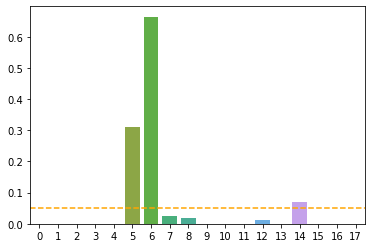

In [29]:
bar_plot = sns.barplot(y = p_values,x = list(range(0,n_features)))
fig = plt.gcf()

ax = plt.gca()

ax.axhline(y = 5/100,c = '#FFA500',ls='--')

ax.set_yscale('linear')

 Selecting only the variables with p-values lesser than 5%

In [43]:
features_selected

array([ 0,  1,  2,  3,  4,  7,  8,  9, 10, 11, 12, 13, 15, 16, 17])

In [30]:
# Features selected
features_selected = np.where(p_values<(5/100))[0]
features_selected_names = []
n_features_selected = len(features_selected)
for i in range(n_features_selected):
    idx = features_selected[i]
    features_selected_names.append(feature_names[idx])


# Displaying Features
features_string = ''
for string in features_selected_names:
    features_string += string + '\n'
print(features_string)

Sex: M
ExerciseAngina: Y
ChestPainType: ASY
ChestPainType: ATA
ChestPainType: NAP
RestingECG: Normal
RestingECG: ST
ST_Slope: Down
ST_Slope: Flat
ST_Slope: Up
Cholesterol
Age
FastingBS
MaxHR
Oldpeak



In [31]:
# Features selected
X_train_sc_features = X_train_sc[:,features_selected]
X_test_sc_features = X_test_sc[:,features_selected]

In [32]:
########################### Logistic Regression ####################################


LR = LogisticRegression(random_state=42,solver='liblinear')

penalty = ['l1','l2']

# Hyperparameters distributions
distributions = dict(C=loguniform(1e-2,1e5),penalty=penalty)


RSCV_LR = RandomizedSearchCV(LR,param_distributions=distributions,n_iter=25,random_state=42)


########################### CART ####################################


cart = DecisionTreeClassifier(random_state=42)



# Hyperparameters distributions
distributions = dict(max_depth=list(range(2,20)))


RSCV_cart = RandomizedSearchCV(cart,param_distributions=distributions,n_iter=15,random_state=42)






########################### Random Forest ####################################


rf = RandomForestClassifier()



# Hyperparameters distributions
distributions = dict(max_depth=list(range(2,20)),n_estimators=randint(50,500))


RSCV_RF = RandomizedSearchCV(rf,param_distributions=distributions,n_iter=10,random_state=42)




########################### SVR ####################################


SV_class = SVC(degree=2)

kernel = ['rbf','poly','sigmoid']

# Hyperparameters distributions
distributions = dict(C=loguniform(1e-2,1e5),kernel=kernel)


RSCV_SVC = RandomizedSearchCV(SV_class,param_distributions=distributions,n_iter=10,random_state=42)


########################### XGBoost ####################################
xgbc = XGBClassifier(eval_metric='logloss',use_label_encoder=False)
# Hyperparameters distributions
param_dist = {'n_estimators': randint(150, 500),
              'learning_rate': loguniform(5e-4, 5e-2),
              'subsample': uniform(0.3, 0.6),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': uniform(0.5, 0.4),
              'min_child_weight': [1, 2, 3, 4]
             }


RSCV_xgb = RandomizedSearchCV(xgbc,param_distributions=param_dist,n_iter=25,random_state=42)


########################### XGBoost ####################################
knn = KNeighborsClassifier()
# Hyperparameters distributions
distributions = dict(n_neighbors=list(range(2,20)))


RSCV_knn = RandomizedSearchCV(knn,param_distributions=distributions,n_iter=10,random_state=42)





########################### Loop ####################################

# Each Random Search Cross Validation
Random_search = {'LR':RSCV_LR,
                'CART':RSCV_cart, 
                'RF':RSCV_RF,
                'SVM':RSCV_SVC,
                'XGBoost':RSCV_xgb,
                'KNN':RSCV_knn}




y_train = y_train.reshape(len(y_train),)
y_test = y_test.reshape(len(y_test),)
Best_model = {}
Results = {}
Best_params = {}
############ Model Loop ################
for s in tqdm(['LR', 'CART', 'RF', 'SVM', 'XGBoost', 'KNN']):
    # Random Grid Search CV
    model_random_search = Random_search[s]
    model_random_search.fit(X_train_sc_features,y_train)
    # Update the best model
    best_model_ = model_random_search.best_estimator_
    y_pred = best_model_.predict(X_test_sc_features)
    Best_model.update({s:best_model_})
    Results.update({s:{'CV_score':model_random_search.best_score_,
                      'Accuracy':accuracy_score(y_test,y_pred),
                      'Classification Report':pd.DataFrame(classification_report(y_test,y_pred,digits=4,output_dict=True)).T}})
    Best_params.update({s:model_random_search.best_params_})

  0%|          | 0/6 [00:00<?, ?it/s]

In [33]:
for model in Results.keys():
    print(model)
    display(Results[model])

LR


{'Accuracy': 0.8405797101449275,
 'CV_score': 0.8784762596899224,
 'Classification Report':               precision    recall  f1-score    support
 0              0.909091  0.746269  0.819672  134.00000
 1              0.795181  0.929577  0.857143  142.00000
 accuracy       0.840580  0.840580  0.840580    0.84058
 macro avg      0.852136  0.837923  0.838407  276.00000
 weighted avg   0.850485  0.840580  0.838951  276.00000}

CART


{'Accuracy': 0.822463768115942,
 'CV_score': 0.8582727713178293,
 'Classification Report':               precision    recall  f1-score     support
 0              0.857143  0.761194  0.806324  134.000000
 1              0.796178  0.880282  0.836120  142.000000
 accuracy       0.822464  0.822464  0.822464    0.822464
 macro avg      0.826661  0.820738  0.821222  276.000000
 weighted avg   0.825777  0.822464  0.821654  276.000000}

RF


{'Accuracy': 0.8260869565217391,
 'CV_score': 0.8753997093023255,
 'Classification Report':               precision    recall  f1-score     support
 0              0.898148  0.723881  0.801653  134.000000
 1              0.779762  0.922535  0.845161  142.000000
 accuracy       0.826087  0.826087  0.826087    0.826087
 macro avg      0.838955  0.823208  0.823407  276.000000
 weighted avg   0.837239  0.826087  0.824038  276.000000}

SVM


{'Accuracy': 0.8333333333333334,
 'CV_score': 0.8676477713178293,
 'Classification Report':               precision    recall  f1-score     support
 0              0.907407  0.731343  0.809917  134.000000
 1              0.785714  0.929577  0.851613  142.000000
 accuracy       0.833333  0.833333  0.833333    0.833333
 macro avg      0.846561  0.830460  0.830765  276.000000
 weighted avg   0.844797  0.833333  0.831369  276.000000}

XGBoost


{'Accuracy': 0.8369565217391305,
 'CV_score': 0.8847383720930232,
 'Classification Report':               precision    recall  f1-score     support
 0              0.908257  0.738806  0.814815  134.000000
 1              0.790419  0.929577  0.854369  142.000000
 accuracy       0.836957  0.836957  0.836957    0.836957
 macro avg      0.849338  0.834192  0.834592  276.000000
 weighted avg   0.847630  0.836957  0.835165  276.000000}

KNN


{'Accuracy': 0.8115942028985508,
 'CV_score': 0.8613735465116278,
 'Classification Report':               precision    recall  f1-score     support
 0              0.872727  0.716418  0.786885  134.000000
 1              0.771084  0.901408  0.831169  142.000000
 accuracy       0.811594  0.811594  0.811594    0.811594
 macro avg      0.821906  0.808913  0.809027  276.000000
 weighted avg   0.820433  0.811594  0.809669  276.000000}

# **Model with all features and $\ell_{1}$ regularization**

Even excluding the least promising variables, we still have a better performance with the XGBoost in all the features.


We can make a more careful hyperparameter selection.

In [34]:
########################### XGBoost ####################################
xgbc = XGBClassifier(eval_metric='logloss',use_label_encoder=False,random_state=42)
# Hyperparameters distributions
param_dist = {'n_estimators': randint(150, 500),
              'learning_rate': loguniform(1e-4, 1e-1),
              'subsample': uniform(0.3, 0.6),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': uniform(0.5, 0.4),
              'min_child_weight': [1, 2, 3, 4],
              'reg_alpha': loguniform(1e-5,1e2)
             }


RSCV_xgb = RandomizedSearchCV(xgbc,param_distributions=param_dist,n_iter=50,random_state=42)


RSCV_xgb.fit(X_train_sc,y_train)


classifier = RSCV_xgb.best_estimator_


y_pred = classifier.predict(X_test_sc)

class_report = pd.DataFrame(classification_report(y_test,y_pred,digits=4,output_dict=True)).T
cv_score = RSCV_xgb.best_score_

display(class_report)
display(cv_score)

,precision,recall,f1-score,support
0,0.896552,0.776119,0.832000,134.000000
1,0.812500,0.915493,0.860927,142.000000
accuracy,0.847826,0.847826,0.847826,0.847826
macro avg,0.854526,0.845806,0.846464,276.000000
weighted avg,0.853308,0.847826,0.846883,276.000000


0.8893653100775193

# **Model with all features and $\ell_{2}$ regularization**

In [35]:
########################### XGBoost ####################################
xgbc = XGBClassifier(eval_metric='logloss',use_label_encoder=False,random_state=42)
# Hyperparameters distributions
param_dist = {'n_estimators': randint(150, 500),
              'learning_rate': loguniform(1e-4, 1e-1),
              'subsample': uniform(0.3, 0.6),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': uniform(0.5, 0.4),
              'min_child_weight': [1, 2, 3, 4],
              'reg_lambda': loguniform(1e-5,1e2)
             }


RSCV_xgb = RandomizedSearchCV(xgbc,param_distributions=param_dist,n_iter=50,random_state=42)


RSCV_xgb.fit(X_train_sc,y_train)


classifier = RSCV_xgb.best_estimator_


y_pred = classifier.predict(X_test_sc)

class_report = pd.DataFrame(classification_report(y_test,y_pred,digits=4,output_dict=True)).T
cv_score = RSCV_xgb.best_score_

display(class_report)
display(cv_score)

,precision,recall,f1-score,support
0,0.897436,0.783582,0.836653,134.000000
1,0.817610,0.915493,0.863787,142.000000
accuracy,0.851449,0.851449,0.851449,0.851449
macro avg,0.857523,0.849538,0.850220,276.000000
weighted avg,0.856366,0.851449,0.850614,276.000000


0.8862766472868217

# **Model with all features without regularization**

In [36]:
########################### XGBoost ####################################
xgbc = XGBClassifier(eval_metric='logloss',use_label_encoder=False,random_state=42)
# Hyperparameters distributions
param_dist = {'n_estimators': randint(150, 500),
              'learning_rate': loguniform(1e-4, 1e-1),
              'subsample': uniform(0.3, 0.6),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': uniform(0.5, 0.4),
              'min_child_weight': [1, 2, 3, 4]
             }


RSCV_xgb = RandomizedSearchCV(xgbc,param_distributions=param_dist,n_iter=50,random_state=42)


RSCV_xgb.fit(X_train_sc,y_train)


classifier = RSCV_xgb.best_estimator_


y_pred = classifier.predict(X_test_sc)

class_report = pd.DataFrame(classification_report(y_test,y_pred,digits=4,output_dict=True)).T
cv_score = RSCV_xgb.best_score_

display(class_report)
display(cv_score)

,precision,recall,f1-score,support
0,0.893805,0.753731,0.817814,134.000000
1,0.797546,0.915493,0.852459,142.000000
accuracy,0.836957,0.836957,0.836957,0.836957
macro avg,0.845676,0.834612,0.835136,276.000000
weighted avg,0.844281,0.836957,0.835638,276.000000


0.8862766472868217

Saving the model

In [37]:
import xgboost as xgb
classifier.save_model('XGBoost_classifier.txt')
classifier = xgb.Booster()
classifier.load_model('XGBoost_classifier.txt')

# **Explaining variables**

In [69]:
import shap
X_sc = sc_X.transform(X)
explainer = shap.TreeExplainer(classifier)
shap_values = explainer.shap_values(X_sc)

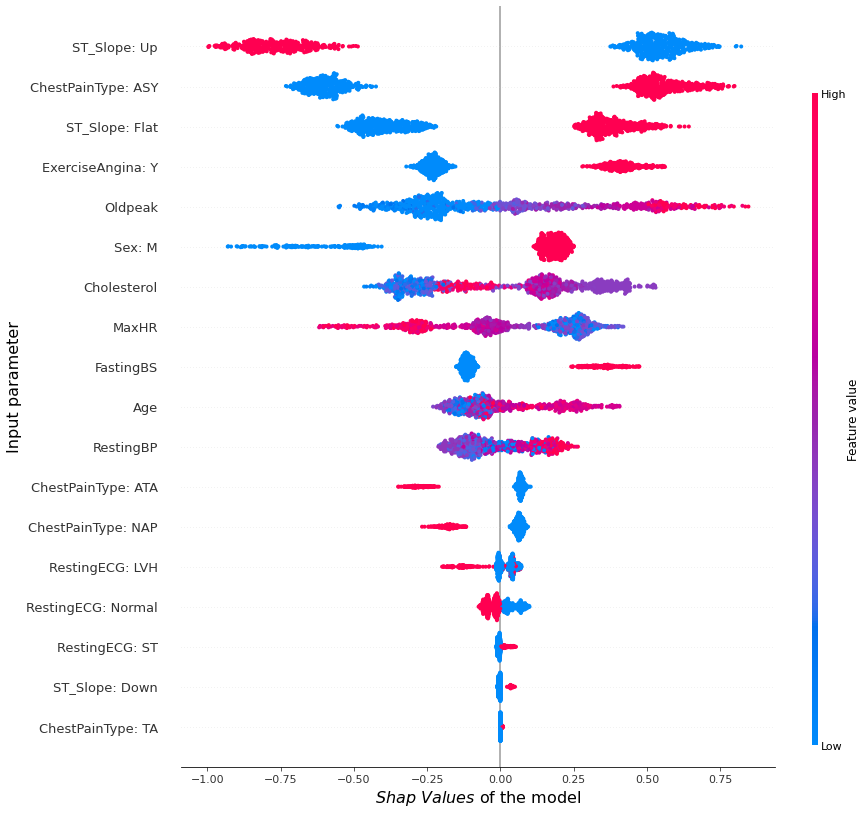

In [71]:

shap.initjs()
k = 0
shap.summary_plot(shap_values,X_sc,feature_names=feature_names[:-1],show=False)


fig = plt.gcf()
fig.set_figheight(12)
fig.set_figwidth(15)
ax = plt.gca()
ax.set_position((.2,.1,0.55,0.88))

ax.set_xlabel('$Shap\ Values$ of the model', fontsize=16)
ax.set_ylabel('Input parameter', fontsize=16)
ylabels = ([tick.get_text() for tick in ax.get_yticklabels()])
ax.set_yticklabels(ylabels)

fig.savefig('shap_explainer.pdf')
plt.show()

We have the following impacts from each feature, infered by the model:

<ol start="1">
  <li>ST_Slope: It is the slope of the ST segment from the electrocardiogram</li>
  <ol type="a">
      <li>Up: the upsloping tend to decrease the chance of having a heart disease.</li>
      <li>Flat: the flat slope tend to increase the chance of having a heart disease.</li>
      <li>Down: the downslope is almost irrelevant to predict the existence of a heart disease.</li>
  </ol>


  <li>Chest Pain Type: Type of chest pain that the patient feels in the </li>
  <ol type="a">
      <li>Up: the upsloping tend to decrease the chance of having a heart disease.</li>
      <li>Flat: the flat slope tend to increase the chance of having a heart disease.</li>
      <li>Down: the downslope is almost irrelevant to predict the existence of a heart disease.</li>
  </ol>
</ol>